# Import

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller


# Import the bt package so we can use the backtesting functions
import bt
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline





# Theory Cointegration

## Stationarity

In [2]:
def generate_data(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

<ipython-input-3-61ca6280aa4c>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index=range(T))
<ipython-input-3-61ca6280aa4c>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index=range(T))


Text(0.5, 1.0, 'Non-Stationary')

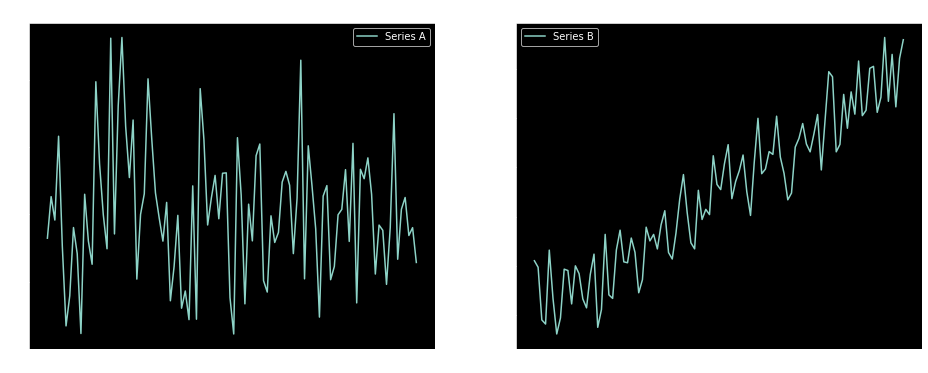

In [3]:
# Stationarity is important in time series analysis


# Set the parameters and the number of datapoints
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_data(params)

T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent( time )
    # mean of the series changes over time
    params = (t * 0.1, 1)
    B[t] = generate_data(params)
    
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols =2, figsize=(16,6))

ax1.plot(A)
ax2.plot(B)
ax1.legend(['Series A'])
ax2.legend(['Series B'])
ax1.set_title('Stationary')
ax2.set_title('Non-Stationary')

In [4]:
def stationarity_test(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')

In [5]:
stationarity_test(A)
stationarity_test(B)

p-value = 1.0065746923878015e-14 The series A is likely stationary.
p-value = 0.9884586001209464 The series B is likely non-stationary.


## Cointegration

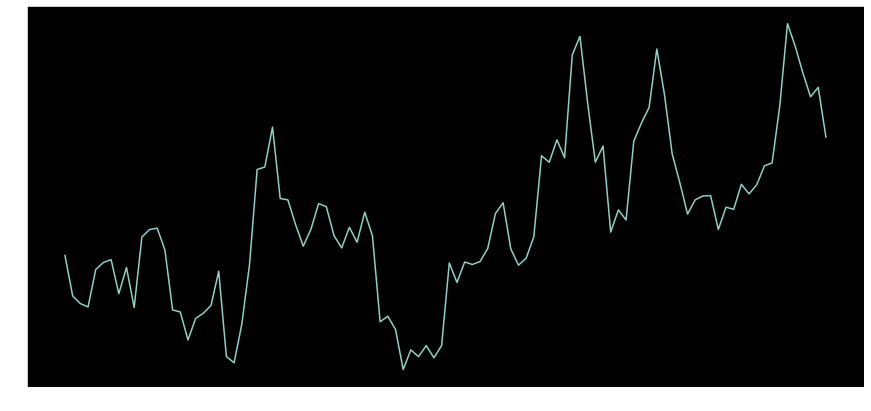

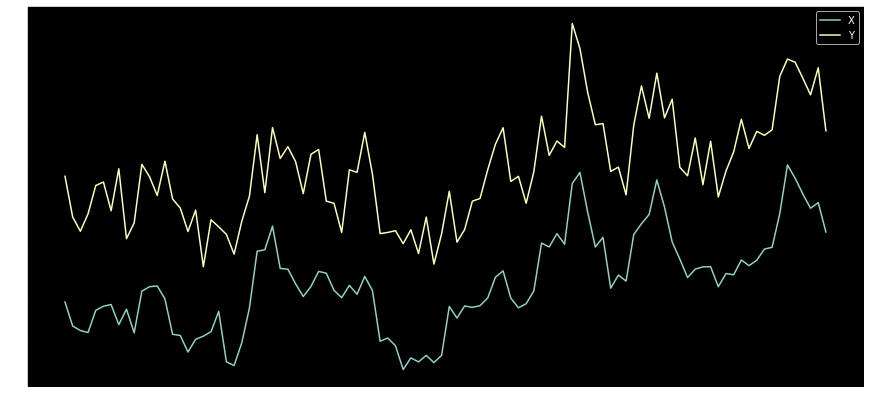

In [6]:
 #Cointegration is NOT equal correlation !



# Generate daily returns

Xreturns = np.random.normal(0, 1, 100)

# sum up and shift the prices up

X = pd.Series(np.cumsum(
    Xreturns), name='X') + 50
X.plot(figsize=(15,7))

noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'

pd.concat([X, Y], axis=1).plot(figsize=(15, 7))

plt.show()

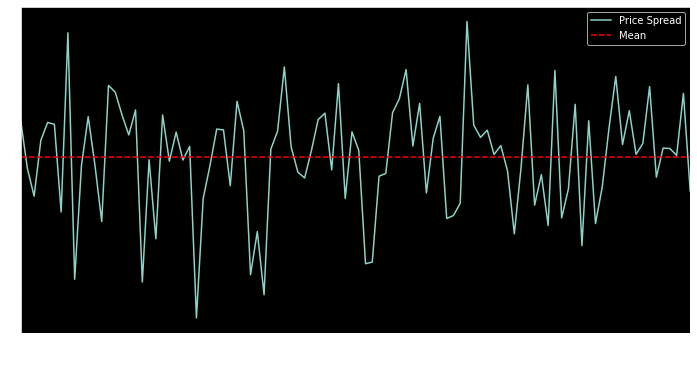

In [7]:
plt.figure(figsize=(12,6))
(Y - X).plot() # Plot the spread
plt.axhline((Y - X).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.xlim(0,99)
plt.legend(['Price Spread', 'Mean']);

### Test

In [8]:
score, pvalue, _ = coint(X,Y)
print(pvalue)

# Low pvalue means high cointegration!

5.540489314147353e-13


### Cointegration VS Correlation Exemple

(0.0, 99.0)

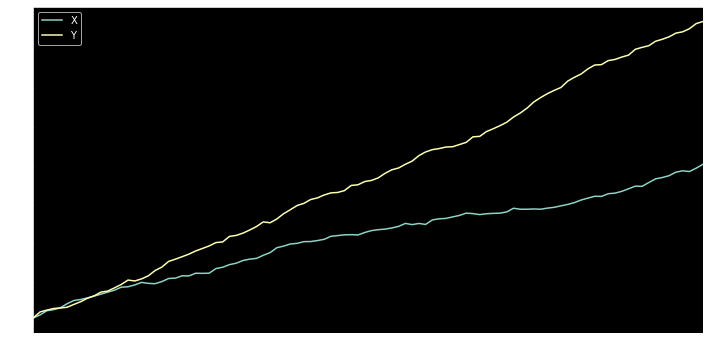

In [9]:
X_returns = np.random.normal(1, 1, 100)
Y_returns = np.random.normal(2, 1, 100)

X_diverging = pd.Series(np.cumsum(X_returns), name='X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name='Y')


pd.concat([X_diverging, Y_diverging], axis=1).plot(figsize=(12,6));
plt.xlim(0, 99)

In [10]:
print('Correlation: ' + str(X_diverging.corr(Y_diverging)))
score, pvalue, _ = coint(X_diverging,Y_diverging)
print('Cointegration test p-value: ' + str(pvalue))


Correlation: 0.9869429238724114
Cointegration test p-value: 0.5847371666218998


# Paired Stock

## Import

In [11]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime

import yfinance as yf
yf.pdr_override()

## Date & Tickers

In [12]:
start = datetime.datetime(2009, 1, 5)
end = datetime.datetime(2018, 1, 5)

#tickers = ['CVX','BP','RDS-A','PBR','EOG','XOM']
#tickers = ['BP','PBR'] # GAZ COMPANY GOOD
#tickers = ['C','BAC','JPM','WFC','GS','MS']
#tickers = ['C','GS'] # BANK COMPANY GOOD 
#tickers = ['TSLA','GM'] # CAR COMPANY GOOD
#tickers = ['MSFT','ABDE'] # SOFWTARE COMPANY GOOD 
tickers = ['AAPL', 'ADBE', 'FB','AMZN' , 'MSFT', 'QCOM', 'JNPR', 'AMD', 'IBM', 'fnf','ebay']
#'aapl','amzn','KO','PEP','TM','VWAGY','MS','XOM'



In [ ]:
df = pdr.get_data_yahoo(tickers, start, end)['Close']
df.tail()

Exception in thread Exception in thread Thread-27Thread-28:
:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread   File "/Applications/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread Thread-29:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Thread-30:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread Thread-31Exception in thread Thread-33:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
:
Exception in thread Traceback (most recent call last):
      File "/Applications/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Thread-32    self.run()self.run()


        obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Applications/anaconda3/lib/python3.8/json/decoder.py", line 355, in raw_decode
return _default_decoder.decode(s)
  File "/Applications/anaconda3/lib/python3.8/json/decoder.py", line 337, in decode
obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Applications/anaconda3/lib/python3.8/json/decoder.py", line 355, in raw_decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Applications/anaconda3/lib/python3.8/json/decoder.py", line 355, in raw_decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Applications/anaconda3/lib/python3.8/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.    JSONDecodeError:     raise JSONDecodeError("Expecting value", s, err.value) from None
j

## Cointegration

### Formula

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

### Heatmap Paired Stocks

In [ ]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(df)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

### P-value verification

In [ ]:
S1 = df['AAPL']
S2 = df['FNF']

score, pvalue, _ = coint(S1, S2)
pvalue

In [ ]:
S3 = df['ADBE']
S4 = df['EBAY']

score, pvalue, _ = coint(S3, S4)
pvalue

In [ ]:
S3 = df['ADBE']
S5 = df['MSFT']

score, pvalue, _ = coint(S3, S5)
pvalue

In [ ]:
S6 = df['AMZN']
S4 = df['EBAY']

score, pvalue, _ = coint(S6, S4)
pvalue

### Spread

In [ ]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['AAPL']
b = results.params['AAPL']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread1']);

In [ ]:
S3 = sm.add_constant(S3)
results = sm.OLS(S4, S3).fit()
S3 = S3['ADBE']
b = results.params['ADBE']

spread = S4 - b * S3
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread2']);


In [ ]:
S3 = sm.add_constant(S3)
results = sm.OLS(S5, S3).fit()
S3 = S3['ADBE']
b = results.params['ADBE']

spread = S5 - b * S3
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread3']);

In [ ]:
S6 = sm.add_constant(S6)
results = sm.OLS(S4, S6).fit()
S6 = S6['AMZN']
b = results.params['AMZN']

spread = S4 - b * S6
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread4']);

### Price Ratio

In [ ]:
ratio1 = S1/S2
ratio1.plot(figsize=(12,6))
plt.axhline(ratio1.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio1']);

In [ ]:
ratio2 = S3/S4
ratio2.plot(figsize=(12,6))
plt.axhline(ratio2.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio2']);






In [ ]:
ratio3 = S3/S5
ratio3.plot(figsize=(12,6))
plt.axhline(ratio3.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio3']);

In [ ]:
ratio4 = S6/S4
ratio4.plot(figsize=(12,6))
plt.axhline(ratio4.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio4']);

### price ratio + z-score

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio1).plot(figsize=(12,6))
plt.axhline(zscore(ratio1).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio1'])
plt.show()

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio2).plot(figsize=(12,6))
plt.axhline(zscore(ratio2).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio2'])
plt.show()


In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio3).plot(figsize=(12,6))
plt.axhline(zscore(ratio3).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio3'])
plt.show()

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio4).plot(figsize=(12,6))
plt.axhline(zscore(ratio4).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio4'])
plt.show()

# Financial Trading

## Price Ticker & Dates

In [ ]:
#define the ticker symbol
tickerSymbol1 = 'AAPL'
tickerSymbol2 = 'FNF'
tickerSymbol3 = 'ADBE'
tickerSymbol4 = 'EBAY'
tickerSymbol5 = 'MSFT'
tickerSymbol6 = 'AMZN'

#get data on this ticker
tickerData1 = yf.Ticker(tickerSymbol1)
tickerData2 = yf.Ticker(tickerSymbol2)
tickerData3 = yf.Ticker(tickerSymbol3)
tickerData4 = yf.Ticker(tickerSymbol4)
tickerData5 = yf.Ticker(tickerSymbol5)
tickerData6 = yf.Ticker(tickerSymbol6)

#get the historical prices for this ticker
AAPL = tickerData1.history(period='1d', start='2017-1-5', end='2018-3-6')
FNF = tickerData2.history(period='1d', start='2017-1-5', end='2018-3-6')
ADBE = tickerData3.history(period='1d', start='2017-1-5', end='2018-3-6')
EBAY = tickerData4.history(period='1d', start='2017-1-5', end='2018-3-6')
MSFT = tickerData5.history(period='1d', start='2017-1-5', end='2018-3-6')
AMZN = tickerData6.history(period='1d', start='2017-1-5', end='2018-3-6')


AAPLp = [AAPL["Close"]]
FNFp =  [FNF["Close"]]
ADBEp = [ADBE["Close"]]
EBAYp = [EBAY["Close"]]
MSFTp = [MSFT["Close"]]
AMZNp = [AMZN["Close"]]



#see your data
#data = [AAPLp["Close"], FNFp["Close"],ADBEp["Close"], EBAYp["Close"],MSFTp["Close"],AMZNp["Close"]]
#data = [AAPLp],[FNFp]
#data2 = [ADBEp],[EBAYp]
#data3 = [ADBEp],[MSFTp]
#data4 = [AMZNp],[EBAYp]
#data
#data2
#data3
#data4


## Signal

### Tickers & Dates

In [ ]:
#data = bt.get('aapl,FNF', start='1/1/2012', end='1/1/2021')
data = bt.get('AAPL,FNF', start='2017-1-6', end='2018-3-6')
data2 = bt.get('ADBE,EBAY', start='2017-1-6', end='2018-3-6')
data3 = bt.get('ADBE,MSFT', start='2017-1-6', end='2018-3-6')
data4 = bt.get('AMZN,EBAY', start='2017-1-6', end='2018-3-6')

### Formula

In [ ]:
P1t = np.asarray([np.asarray(AAPLp)])
P2t = np.asarray([np.asarray(FNFp)])
P3t = np.asarray([np.asarray(ADBEp)])
P4t = np.asarray([np.asarray(EBAYp)])
p5t = np.asarray([np.asarray(MSFTp)])
p6t = np.asarray([np.asarray(AMZNp)])
# strategy 1
Rt = (P1t)/(P2t)
# strategy 2
Rt2 = (P3t)/(P4t)
# strategy 3
Rt3 = (P3t)/(p5t)
# strategy 4
Rt4 = (p6t)/(P4t)

### Vector Creation (Signal)

In [ ]:
### Empty Vector 

#Only to generate a list

# strategy 1
short = 50
sma_short = data.rolling(short).mean()

# strategy 2
short2 = 50
sma_short2 = data2.rolling(short2).mean()

# strategy 3
short3 = 50
sma_short3 = data3.rolling(short3).mean()

# strategy 4
short4 = 50
sma_short4 = data4.rolling(short4).mean()



In [ ]:
# Create a vector  for strategy 1 

Rt = (P1t)/(P2t)
#Rt1 = (P1t1)/(P2t1)
Rt = Rt[0][0]

#Signal = (Rt) - (Rt1)
Signal = []
for i in range(len(Rt)):
    if i != 0:
        Signal.append(Rt[i]-Rt[i-1])

print(Signal)

signalF = sma_short.copy()
signalF
signal1 = np.array(Signal)

signalF['signal1'] = signal1.tolist()
#signalF.drop('aapl')
print(signalF)


In [ ]:
# Create a vector  for stragy 2 

Rt2 = (P3t)/(P4t)
Rt2 = Rt2[0][0]

#Signal = (Rt) - (Rt1)
SignalB = []
for i in range(len(Rt2)):
    if i != 0:
        SignalB.append(Rt2[i]-Rt2[i-1])

print(SignalB)

signalF2 = sma_short2.copy()
signalF2
signal2 = np.array(SignalB)

signalF2['signal2'] = signal2.tolist()
#signalF.drop('aapl')
print(signalF2)

  
    
    

In [ ]:
# Create a vector  for stragy 3

Rt3 = (P3t)/(p5t)
Rt3 = Rt3[0][0]

# Create a loop to substract t-1 to t1 and create the signal
SignalC = []
for i in range(len(Rt3)):
    if i != 0:
        SignalC.append(Rt3[i]-Rt3[i-1])

print(SignalC)

signalF3 = sma_short3.copy()
signalF3
signal3 = np.array(SignalC)

signalF3['signal3'] = signal3.tolist()
#signalF.drop('aapl')
print(signalF3)

In [ ]:
# Create a vector  for stragy 4 

Rt4 = (p6t)/(P4t)
Rt4 = Rt4[0][0]

#Create a loop to substract t-1 to t1 and create the sign
SignalD = []
for i in range(len(Rt4)):
    if i != 0:
        SignalD.append(Rt4[i]-Rt4[i-1])

print(SignalD)

signalF4 = sma_short4.copy()
signalF4
signal4 = np.array(SignalD)

signalF4['signal4'] = signal4.tolist()
#signalF.drop('aapl')
print(signalF4)

### Target Weights (Based on Signal)

In [ ]:
 #weight the portfolio based on the signal.
    
    
#strategy 1
target_weights = signalF

# set appropriate target weights
target_weights[signalF["signal1"] > 0] =  0.5
target_weights[signalF["signal1"] <= 0] = -0.5
print(target_weights)

 #strategy 2
target_weights2 = signalF2
# set appropriate target weights
target_weights2[signalF2["signal2"] > 0] =  0.5
target_weights2[signalF2["signal2"] <= 0] = -0.5
print(target_weights2)

 #strategy 3
target_weights3 = signalF3
# set appropriate target weights
target_weights3[signalF3["signal3"] > 0] =  0.5
target_weights3[signalF3["signal3"] <= 0] = -0.5
print(target_weights3)

 #strategy 4
target_weights4 = signalF4
# set appropriate target weights
target_weights4[signalF4["signal4"] > 0] =  0.5
target_weights4[signalF4["signal4"] <= 0] = -0.5
print(target_weights4)

In [ ]:
# Adjust the column to make sure paired will be buy and sell based on the signal : if signal is positif => sell first column and buy the second


#strategy 1
target_weights["aapl"] = target_weights["aapl"] * (-1)

#strategy 2
target_weights2["adbe"] = target_weights2["adbe"] * (-1)

#strategy 3
target_weights3["adbe"] = target_weights3["adbe"] * (-1)

#strategy 4
target_weights4["amzn"] = target_weights4["amzn"] * (-1)
#target_weights = target_weights.drop("signal1")
#target_weigths = target_weights.drop(columns = "signal1")
print(target_weights)
print(target_weights2)
print(target_weights3)
print(target_weights4)


In [ ]:
#remove signal to use it as target_weight for our strategies

#strategy 1
target_weights = target_weights.drop(columns = "signal1")
target_weights2 = target_weights2.drop(columns = "signal2")
target_weights3 = target_weights3.drop(columns = "signal3")
target_weights4 = target_weights4.drop(columns = "signal4")

print(target_weights)
print(target_weights2)
print(target_weights3)
print(target_weights4)


## Strategies 

In [ ]:
# Create strategies for each paired stocks


#Strategies
ST1 = bt.Strategy('ST1', [bt.algos.RunDaily(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighTarget(target_weights),
                              bt.algos.Rebalance()],
                    ['aapl', 'fnf'])

ST2 = bt.Strategy('ST2', [bt.algos.RunDaily(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighTarget(target_weights2),
                              bt.algos.Rebalance()],
                    ['adbe', 'ebay'])

ST3 = bt.Strategy('ST3', [bt.algos.RunDaily(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighTarget(target_weights3),
                              bt.algos.Rebalance()],
                    ['adbe', 'msft'])
ST4 = bt.Strategy('ST4', [bt.algos.RunDaily(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighTarget(target_weights4),
                              bt.algos.Rebalance()],
                    ['amzn', 'ebay'])

#test strategies
TST1 = bt.Backtest(ST1, data)
TST2 = bt.Backtest(ST2, data2)
TST3 = bt.Backtest(ST3, data3)
TST4 = bt.Backtest(ST4, data4)

#RES STRATEGIES
res_ST1 = bt.run(TST1)
res_ST2 = bt.run(TST2)
res_ST3 = bt.run(TST3)
res_ST4 = bt.run(TST4)

# plot security weights to test logic
res_ST1.plot_security_weights()
res_ST1.plot()
res_ST1.display()

res_ST2.plot_security_weights()
res_ST2.plot()
res_ST2.display()

res_ST3.plot_security_weights()
res_ST3.plot()
res_ST3.display()

res_ST4.plot_security_weights()
res_ST4.plot()
res_ST4.display()




In [ ]:
#create a benchmark for the paired stocks


Benchmark1 = bt.Strategy('Benchmark1',[bt.algos.RunDaily(),
                            bt.algos.SelectAll(),         
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()],
                         ['aapl', 'fnf'])

Benchmark2 = bt.Strategy('Benchmark2',[bt.algos.RunDaily(),
                            bt.algos.SelectAll(),         
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()],
                         ['adbe', 'ebay'])

Benchmark3 = bt.Strategy('Benchmark3',[bt.algos.RunDaily(),
                            bt.algos.SelectAll(),         
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()],
                         ['adbe', 'msft'])

Benchmark4 = bt.Strategy('Benchmark4',[bt.algos.RunDaily(),
                            bt.algos.SelectAll(),         
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()],
                         ['amzn', 'ebay'])
#test strategies
TBenchmark1 = bt.Backtest(Benchmark1, data)
TBenchmark2 = bt.Backtest(Benchmark2, data2)
TBenchmark3 = bt.Backtest(Benchmark3, data3)
TBenchmark4 = bt.Backtest(Benchmark4, data4)

#RES STRATEGIES
res_Benchmark1 = bt.run(TBenchmark1)
res_Benchmark2 = bt.run(TBenchmark2)
res_Benchmark3 = bt.run(TBenchmark3)
res_Benchmark4 = bt.run(TBenchmark4)

# plot security weights to test logic
res_Benchmark1.plot_security_weights()
res_Benchmark1.plot()
res_Benchmark1.display()

res_Benchmark2.plot_security_weights()
res_Benchmark2.plot()
res_Benchmark2.display()

res_Benchmark3.plot_security_weights()
res_Benchmark3.plot()
res_Benchmark3.display()

res_Benchmark4.plot_security_weights()
res_Benchmark4.plot()
res_Benchmark4.display()



        

## Master

### Ticker and Dates

In [ ]:
dataPF = bt.get('aapl,fnf,adbe,ebay,amzn,msft', start='2017-1-5', end='2018-3-5')

### Master startegies and Benchmarks

In [ ]:
master = bt.Strategy('master', [bt.algos.RunDaily(),
                                bt.algos.SelectHasData(include_no_data=True),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [ST1,ST2,ST3,ST4])

# create the backtest and run it
testPF = bt.Backtest(master, dataPF)
# create results so we can display and plot
resultsPF = bt.run(testPF)

resultsPF.plot()
resultsPF.display()
resultsPF.plot_security_weights()

In [ ]:
masterB = bt.Strategy('masterB', [bt.algos.RunDaily(),
                                bt.algos.SelectAll(include_no_data=True),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [Benchmark1,Benchmark2,Benchmark3,Benchmark4])

# create the backtest and run it
testmasterB = bt.Backtest(masterB, dataPF)
# create results so we can display and plot
resultsmasterB = bt.run(testmasterB)

resultsmasterB.plot()
resultsmasterB.display()
resultsmasterB.plot_security_weights()